# Lab CMBLenses

## Model

In [1]:
] activate "/home/jaimerz/julia_repos/CMBLensingInferenceTestProblem"

  Activating project at `~/julia_repos/CMBLensingInferenceTestProblem`


In [2]:
using CMBLensing, CMBLensingInferenceTestProblem
using CUDA, LaTeXStrings, MCMCDiagnosticTools, Plots, ProgressMeter, Random, Zygote
using LinearAlgebra, Statistics
ENV["LINES"] = 10;

In [3]:
using Revise
using MCHMC

[ Info: Precompiling MCHMC [92da4d09-9da0-4f8a-8b31-da41ef0ab6ee]


In [4]:
prob = load_cmb_lensing_problem(storage = Array,
                                T = Float32,
                                Nside = 4);

MAP_joint: 100%|████████████████████████████████████████| Time: 0:00:48
  step:        20
  logpdf:      377.00
  α:           0.008522608
  CG:          2 iterations
  Linesearch:  9 bisections


In [5]:
target = CMBLensingTarget(prob)

CMBLensingTarget(50, [0.0 0.0 … 0.0 0.0; 0.0 4.224938869476318 … 0.0 0.0; … ; 0.0 0.0 … 1.0 0.0; 0.0 0.0 … 0.0 1.0], MCHMC.var"#nlogp#31"{CMBLensingInferenceTestProblem.CMBLensingLogDensityProblem, MCHMC.var"#inv_transform#30"{Diagonal{Float64, Field-(f°,ϕ°,θ)-Tuple{LambertEBFourier{Array{Float32, 3}}, LambertFourier{Array{Float32, 2}}, ComponentArrays.ComponentVector{Float64, Vector{Float64}, Tuple{ComponentArrays.Axis{(r = 1, Aϕ = 2)}}}}}}}(CMBLensingInferenceTestProblem.CMBLensingLogDensityProblem(BaseDataSet(d, Cf, Cn, Cn̂, M, M̂, B, B̂, logprior, Cϕ, Cf̃, D, G, L, Nϕ), [0.23362982273101807, 1.6145217418670654, -1.8872356414794922, -3.2767221927642822, 0.8644531965255737, 2.2458934783935547, -1.246073603630066, -2.639155864715576, 1.868626356124878, 3.251345157623291  …  -3.395840053599386e-9, 3.6597669339499816e-11, 4.677404241704153e-9, 1.211756028851596e-9, -5.810230518932258e-9, -2.3360031686792126e-9, 2.561251877253312e-9, -9.142808177209361e-10, -1.6094379124341003, 0.0], [0.

## Sample

In [6]:
eps=0.1
L=sqrt(target.d)
spl=Sampler(;eps=eps, L=L)

Sampler(Settings(MersenneTwister(0), 0.1, 7.0710678118654755, 0.0, 0.1931833275037836, 0.0005, 2000, 1000, 10, "LF"), MCHMC.Leapfrog)

In [45]:
samples = Sample(spl, target, 1000, monitor_energy=true)

Row,Ω,Energy
,Any,Any
1,"[0.240736, 1.62163, -1.88013, -3.26962, 0.87156, 2.253, -1.23897, -2.63205, 1.87573, 3.25845 … -3.39584e-9, 3.65977e-11, 4.6774e-9, 1.21176e-9, -5.81023e-9, -2.336e-9, 2.56125e-9, -9.14281e-10, -1.60944, 0.0]",1257.69
2,"[0.243368, 1.62649, -1.88679, -3.2609, 0.873273, 2.25182, -1.23309, -2.64238, 1.87055, 3.2583 … -3.87565e-9, 3.24092e-11, 5.34779e-9, 1.22972e-9, -5.53894e-9, -2.27297e-9, 3.01283e-9, -2.68533e-10, -1.61491, 0.0183247]",1257.69
3,"[0.244324, 1.63328, -1.89459, -3.25023, 0.875384, 2.25223, -1.22986, -2.65346, 1.86581, 3.2598 … -4.32405e-9, -2.17082e-11, 5.96315e-9, 1.23969e-9, -5.24131e-9, -2.24244e-9, 3.4799e-9, 4.13087e-10, -1.62141, 0.038111]",1257.69
4,"[0.244443, 1.64114, -1.90459, -3.24048, 0.877329, 2.25046, -1.22569, -2.66226, 1.86163, 3.2604 … -4.58904e-9, -4.58134e-11, 6.485e-9, 1.27667e-9, -4.88231e-9, -2.26123e-9, 3.88859e-9, 1.14154e-9, -1.62591, 0.0568379]",1257.69
5,"[0.246327, 1.64955, -1.91518, -3.23032, 0.879914, 2.24956, -1.22, -2.67343, 1.85679, 3.26257 … -4.8723e-9, -5.13353e-11, 6.99633e-9, 1.25711e-9, -4.55999e-9, -2.19718e-9, 4.28131e-9, 1.75135e-9, -1.63198, 0.0766195]",1257.69
6,"[0.250383, 1.65754, -1.92448, -3.2215, 0.882767, 2.24806, -1.2159, -2.68596, 1.85217, 3.26649 … -5.13594e-9, 7.48483e-12, 7.48159e-9, 1.20669e-9, -4.29702e-9, -2.15523e-9, 4.67587e-9, 2.32245e-9, -1.63774, 0.0951474]",1257.69
7,"[0.255639, 1.66443, -1.93546, -3.21047, 0.883311, 2.24658, -1.2112, -2.69707, 1.84545, 3.27354 … -5.41909e-9, 8.45632e-11, 7.9626e-9, 1.13058e-9, -3.96309e-9, -2.0181e-9, 5.12608e-9, 2.93464e-9, -1.64292, 0.115212]",1257.69
8,"[0.260102, 1.67309, -1.94471, -3.19997, 0.883748, 2.24481, -1.20625, -2.70737, 1.84005, 3.27625 … -5.68214e-9, 2.27555e-10, 8.63052e-9, 1.18559e-9, -3.66963e-9, -1.86681e-9, 5.61828e-9, 3.58387e-9, -1.65001, 0.133123]",1257.69
9,"[0.266608, 1.68078, -1.95526, -3.19127, 0.884247, 2.24342, -1.20037, -2.71835, 1.83615, 3.27886 … -5.90073e-9, 4.79568e-10, 9.35675e-9, 1.2076e-9, -3.3041e-9, -1.70326e-9, 6.11554e-9, 4.26991e-9, -1.65504, 0.145998]",1257.69


## Plotting

In [46]:
Plots.default(fmt=:png, dpi=120, size=(500,300), legendfontsize=10)

In [47]:
rs = [Vector(sample)[end-1] for sample in samples.Ω]
Aϕs = [Vector(sample)[end] for sample in samples.Ω];

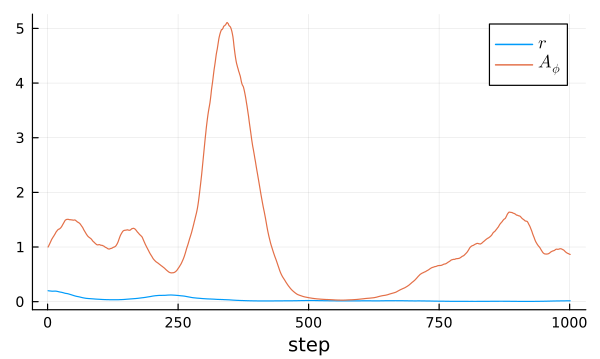

In [48]:
plot(exp.(rs), label=L"r", xlabel="step")
plot!(exp.(Aϕs), label=L"A_\phi")


In [49]:
println("Energy: ", mean(samples.Energy), " -/+ ", std(samples.Energy))

Energy: 1257.3025063997504 -/+ 0.09484093500507547


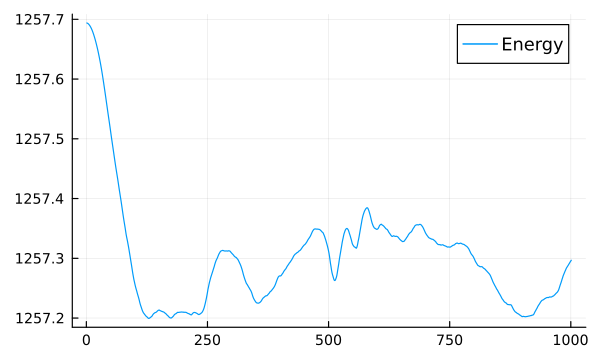

In [50]:
plot(samples.Energy, label="Energy")

In [14]:
println(mean(exp.(rs)), " ", std(exp.(rs)))

LoadError: UndefVarError: `rs` not defined

In [15]:
println(mean(exp.(Aϕs)), " ", std(exp.(Aϕs)))

LoadError: UndefVarError: `Aϕs` not defined

In [16]:
plot(exp.(rs), label=L"r", xlabel="step")
plot!(exp.(Aϕs), label=L"A_\phi")

LoadError: UndefVarError: `rs` not defined

In [17]:
plot(histogram(exp.(rs), xlabel=L"r", label=nothing, lw=1),
    histogram(exp.(Aϕs), xlabel=L"A_\phi", label=nothing, lw=1))

LoadError: UndefVarError: `rs` not defined